In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [17]:
file_path = "C:\\Users\\91755\\Desktop\\Clustering\\Clustering\\EastWestAirlines.xlsx"
df = pd.read_excel(file_path, sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [23]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [43]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

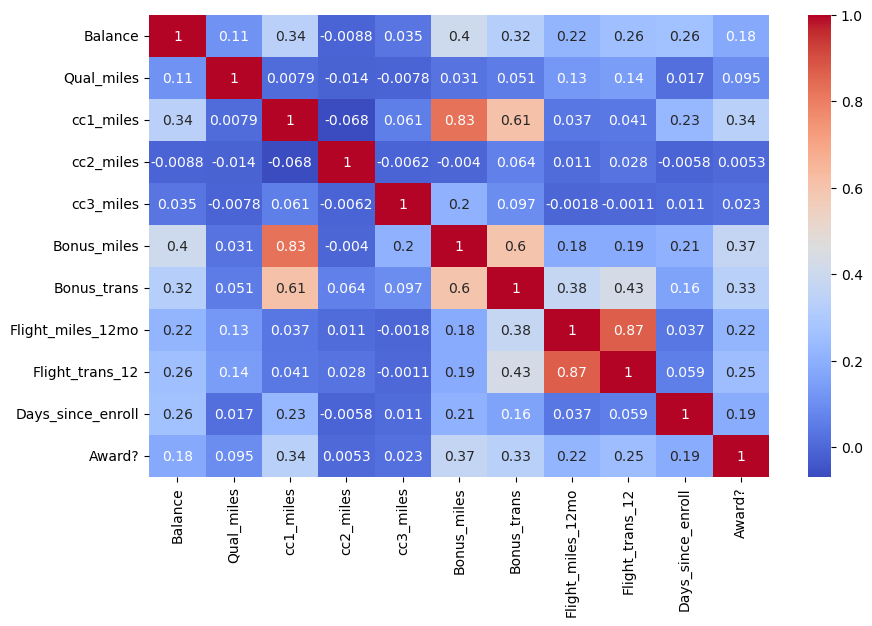

In [51]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [59]:
df.columns = df.columns.str.strip()
df.drop(columns=["ID#"], inplace=True, errors='ignore')  # errors='ignore' prevents crashing if the column doesn't exist

In [65]:
# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
3992,11181,0,1,1,1,929,12,0,0,1407,0
3993,3974,0,1,1,1,365,3,0,0,1397,0
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1


In [69]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.2836972 ,  0.        , -0.64813648, ...,  0.        ,
         1.54012887, -0.55070744],
       [-0.56167475,  0.        , -0.64813648, ...,  0.        ,
         1.52461143, -0.55070744],
       [ 0.12897405,  0.        , -0.64813648, ...,  0.        ,
         1.55661615, -0.55070744],
       ...,
       [ 0.84839209,  0.        , -0.64813648, ...,  0.        ,
        -1.17784748,  1.81584617],
       [ 1.1361468 ,  0.        ,  1.33502752, ...,  0.        ,
        -1.17445304,  1.81584617],
       [-1.06858786,  0.        , -0.64813648, ...,  0.        ,
        -1.17639272, -0.55070744]])

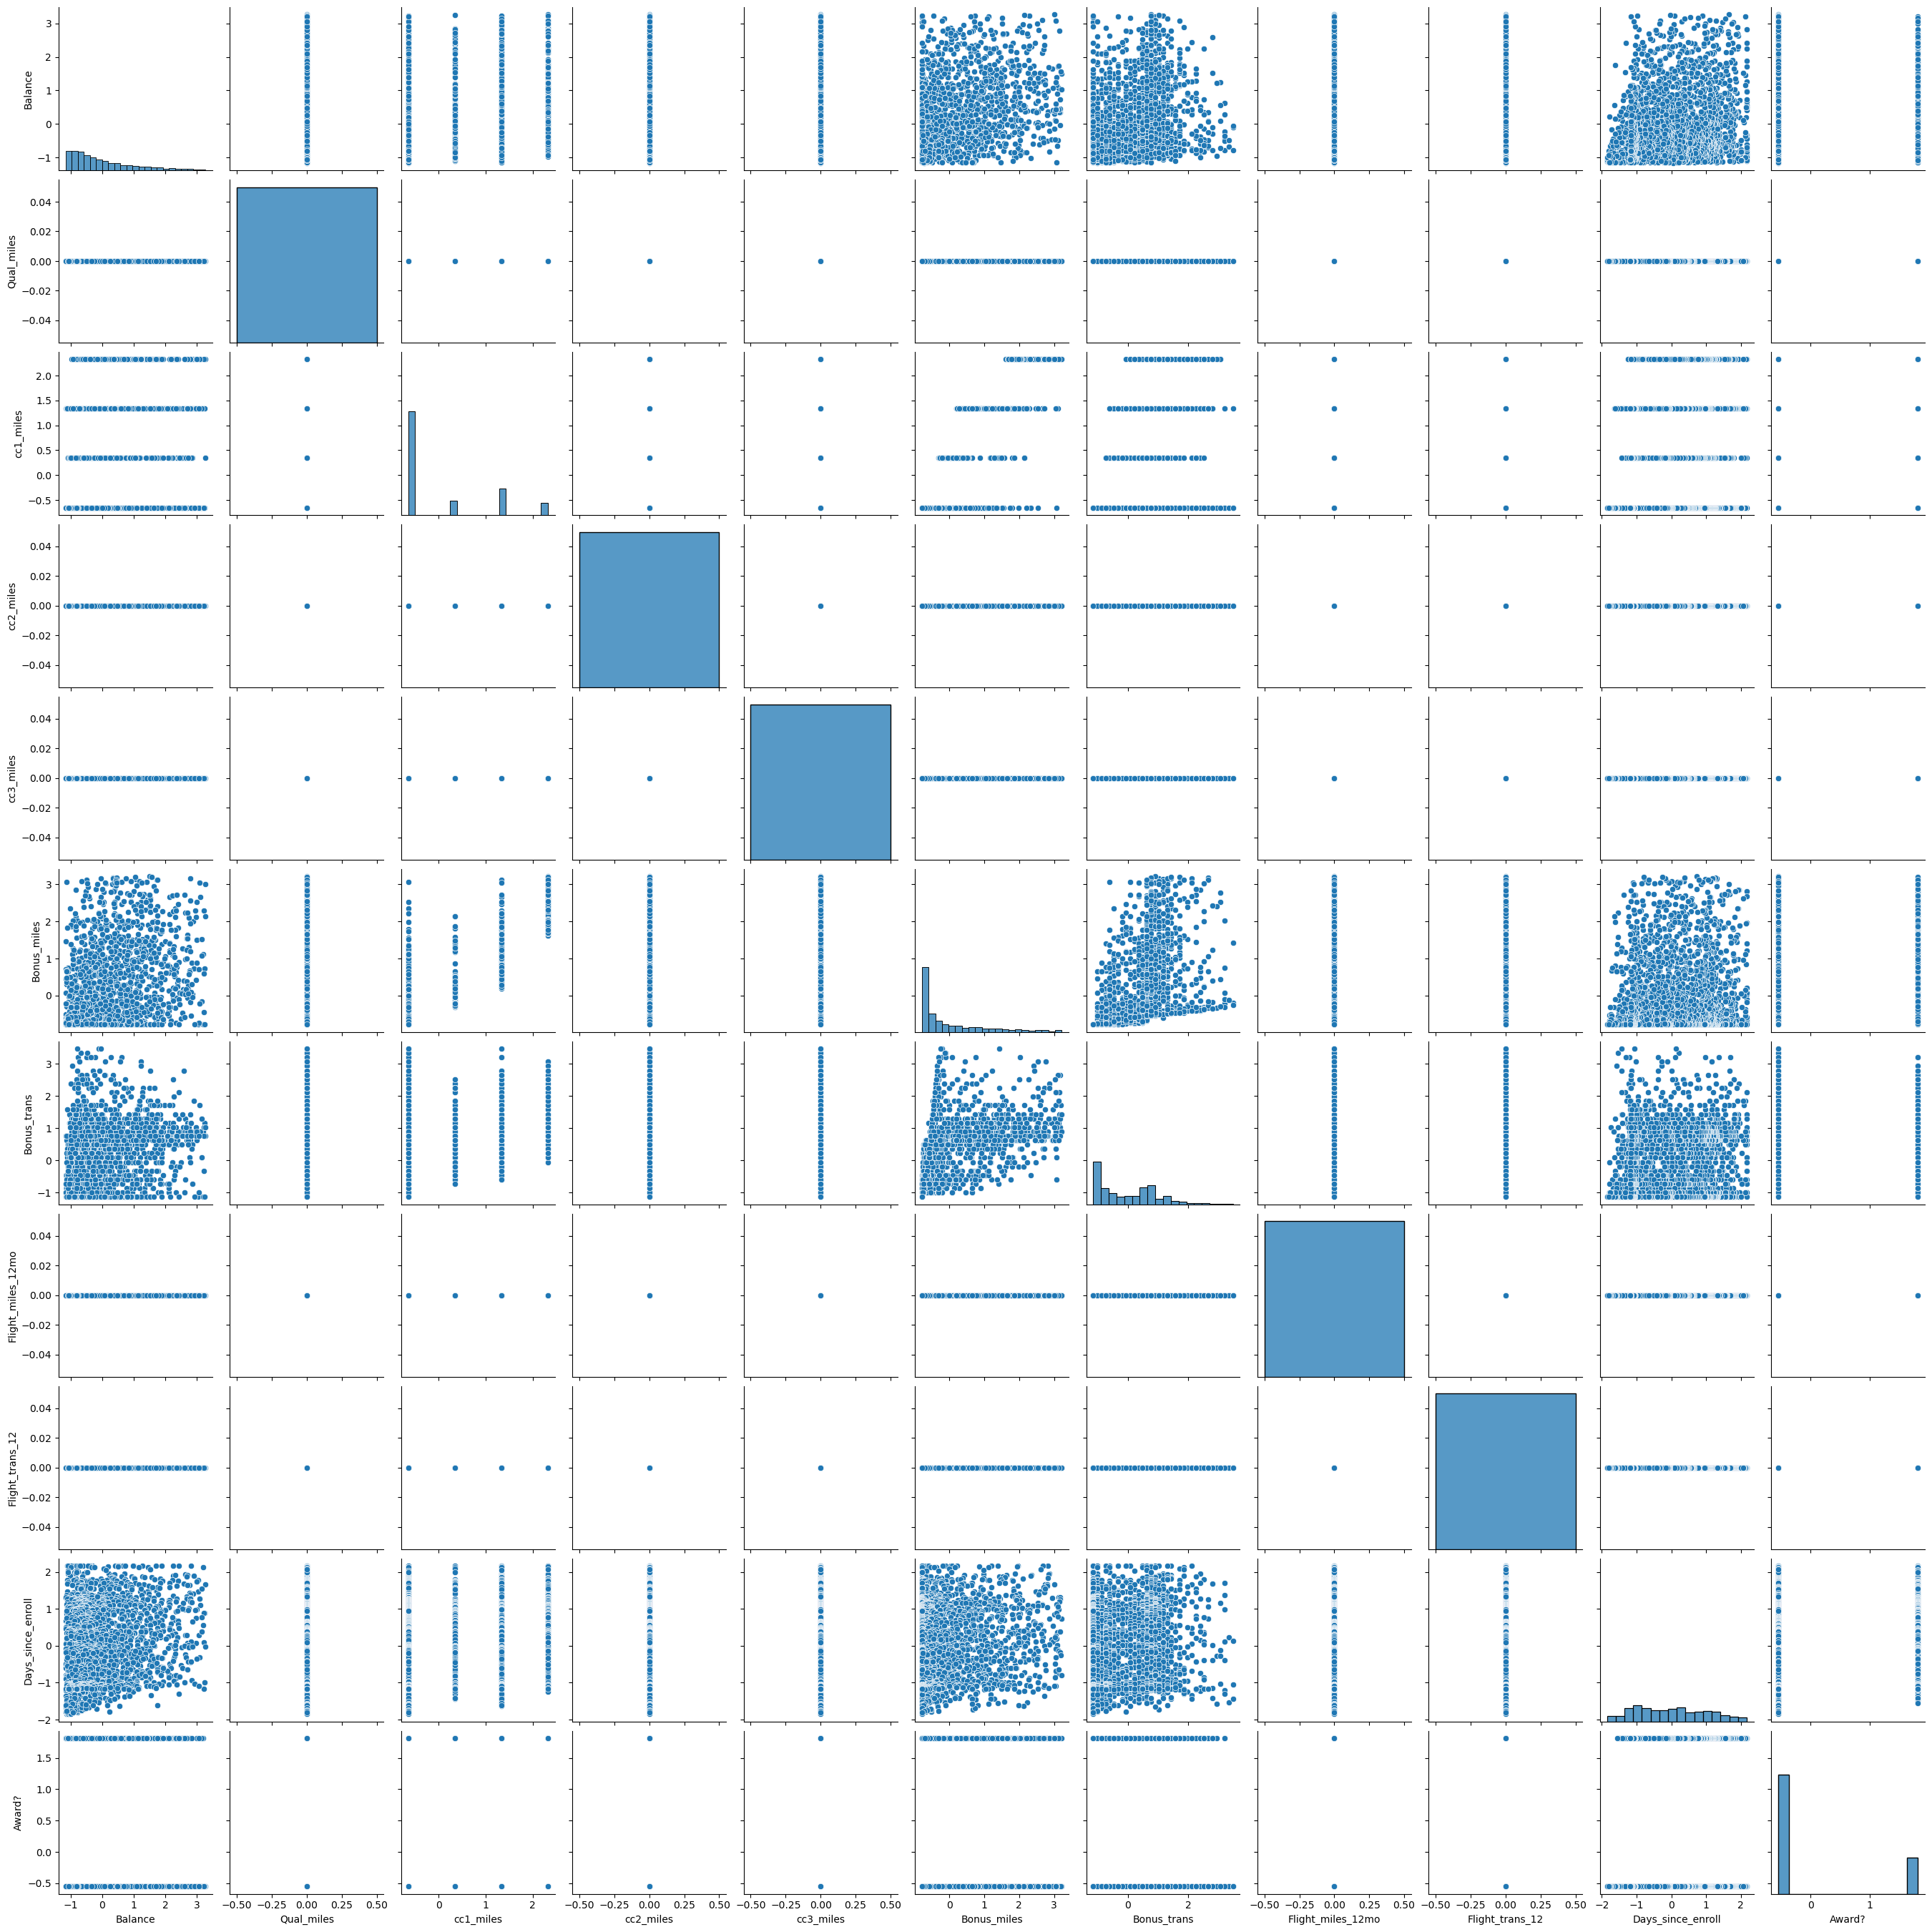

In [71]:
# Pairplot
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))
plt.show()

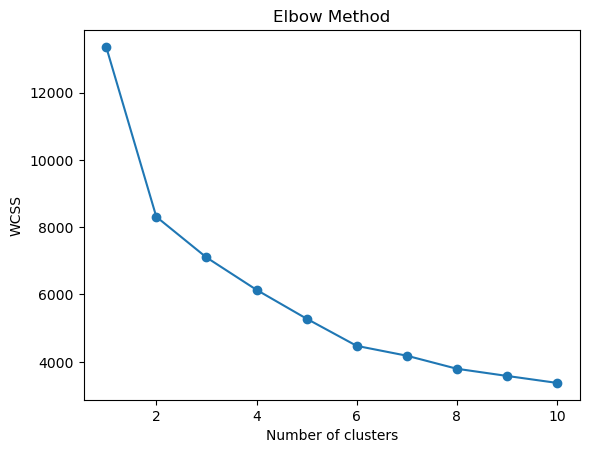

In [73]:
#K-Means Clustering
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [75]:
# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_labels

array([1, 1, 1, ..., 1, 2, 1])

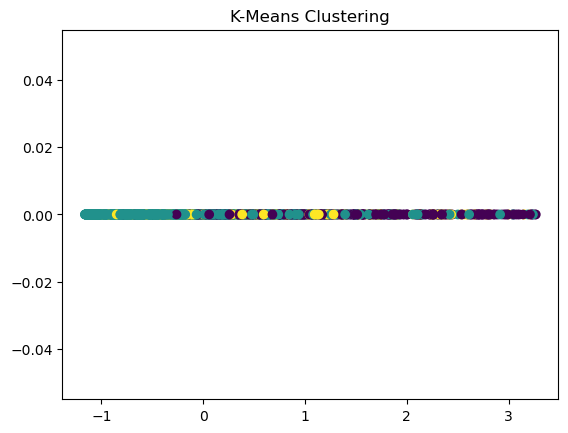

In [77]:
# Visualizing clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

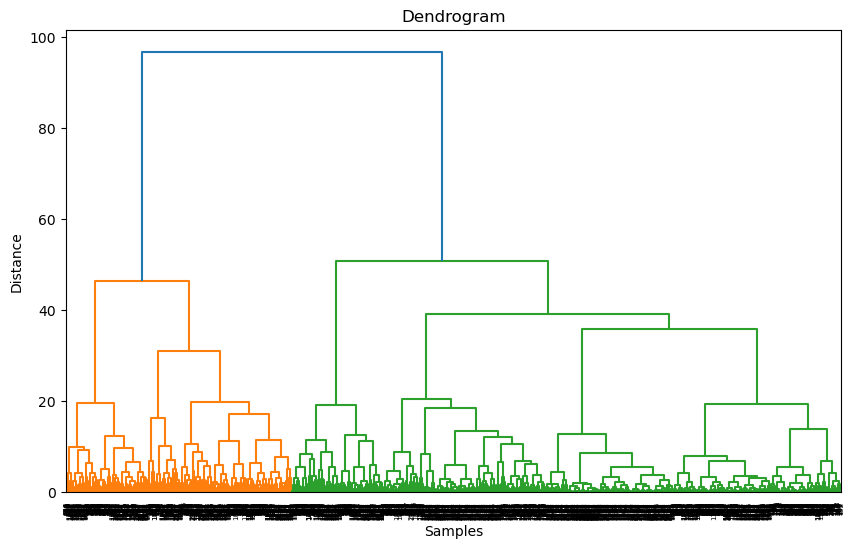

In [79]:
#Hierarchical Clustering
# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Dendrogram visualization
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cutting the dendrogram
hier_labels = fcluster(linked, 3, criterion='maxclust')

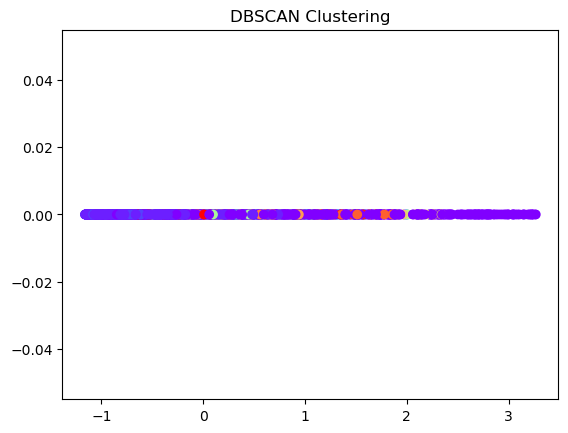

In [81]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Visualizing DBSCAN results
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

In [83]:
# Compare clustering results
print("Silhouette Score for K-Means:", silhouette_score(df_scaled, kmeans_labels))
print("Silhouette Score for Hierarchical:", silhouette_score(df_scaled, hier_labels))
print("Silhouette Score for DBSCAN:", silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A')

Silhouette Score for K-Means: 0.3676432454732502
Silhouette Score for Hierarchical: 0.3189302511734213
Silhouette Score for DBSCAN: -0.12547855601752442
